<a href="https://colab.research.google.com/github/prad69/MLAssignments/blob/main/UML1_Assignment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')
X_train = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/datasets/unsupervised/X_train.txt")
y_train = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/datasets/unsupervised/y_train.txt").astype(int)

X_test = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/datasets/unsupervised/X_test.txt")
y_test = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/datasets/unsupervised/y_test.txt").astype(int)

Mounted at /content/drive


1. Write a function to merge training and testing numpy arrays together as we are going to do unsupervised learning and we don't need separate data

In [4]:
X=np.concatenate((X_train, X_test), axis=0)

X.shape

(10299, 561)

2. Write a code to transform the data using PCA  to cover the 80% of the variance of the original (scaled) data?

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(random_state=123)
pca.fit(X_scaled)

PCA(random_state=123)

3. How many principal components cover 80% of the variance in data?

In [6]:
pca.components_[0]

array([ 0.00032202, -0.00265502, -0.00183102,  0.05640365,  0.05677673,
        0.05438696,  0.05620397,  0.05629792,  0.05394706,  0.05592999,
        0.05495862,  0.05351463, -0.05624353, -0.05559214, -0.05288837,
        0.05768456,  0.051499  ,  0.05197975,  0.04686355,  0.05522047,
        0.05450488,  0.05221183,  0.04846778,  0.05036256,  0.04769178,
       -0.04122402,  0.03408445, -0.02067453,  0.01608156, -0.03273157,
        0.03240098, -0.01038663,  0.00046632, -0.03044505,  0.03181687,
       -0.01485079,  0.00799314, -0.02247826, -0.00283784,  0.01006421,
        0.02404284, -0.03001682, -0.02739536,  0.00884601,  0.01074907,
        0.0120122 ,  0.00891211,  0.01077357,  0.01189365,  0.02473032,
       -0.02943971, -0.02668211,  0.02339869, -0.03047745, -0.02807688,
       -0.007124  ,  0.02370992, -0.02029167, -0.01936607,  0.0092052 ,
        0.01080988,  0.01145887,  0.02344876, -0.01416243, -0.0017441 ,
       -0.0081702 ,  0.01468666, -0.02093452,  0.02646854,  0.01

4. What percentage of the variance is covered by the top 3 principal components?

In [7]:
pca.explained_variance_ratio_

array([5.07382210e-01, 6.23918578e-02, 2.69256386e-02, 2.45287097e-02,
       1.88893566e-02, 1.63139540e-02, 1.41453324e-02, 1.21621062e-02,
       9.85247564e-03, 9.49228193e-03, 8.58303631e-03, 8.09979908e-03,
       7.65862670e-03, 6.76667617e-03, 6.30241618e-03, 6.15717733e-03,
       5.95334955e-03, 5.77195494e-03, 5.63431287e-03, 5.40829854e-03,
       5.18827870e-03, 5.02741666e-03, 4.73229478e-03, 4.63818462e-03,
       4.46848418e-03, 4.39868265e-03, 4.16863053e-03, 4.00808602e-03,
       3.89071892e-03, 3.81338573e-03, 3.66869737e-03, 3.64357439e-03,
       3.49224522e-03, 3.46736068e-03, 3.35538910e-03, 3.29410516e-03,
       3.23824350e-03, 3.00508156e-03, 2.94253973e-03, 2.90452465e-03,
       2.75764996e-03, 2.69864104e-03, 2.64195735e-03, 2.58030269e-03,
       2.55030824e-03, 2.47775822e-03, 2.45537494e-03, 2.38290353e-03,
       2.35901952e-03, 2.32043684e-03, 2.28360307e-03, 2.19181663e-03,
       2.12631367e-03, 2.09144562e-03, 2.03479658e-03, 2.01166715e-03,
      

5. Write a code to visualize data on a 2-D plot

In [8]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.50738221, 0.56977407, 0.59669971, 0.62122842, 0.64011777,
       0.65643173, 0.67057706, 0.68273917, 0.69259164, 0.70208392,
       0.71066696, 0.71876676, 0.72642539, 0.73319206, 0.73949448,
       0.74565165, 0.751605  , 0.75737696, 0.76301127, 0.76841957,
       0.77360785, 0.77863527, 0.78336756, 0.78800575, 0.79247423,
       0.79687291, 0.80104154, 0.80504963, 0.80894035, 0.81275373,
       0.81642243, 0.82006601, 0.82355825, 0.82702561, 0.830381  ,
       0.83367511, 0.83691335, 0.83991843, 0.84286097, 0.84576549,
       0.84852314, 0.85122179, 0.85386374, 0.85644405, 0.85899435,
       0.86147211, 0.86392749, 0.86631039, 0.86866941, 0.87098985,
       0.87327345, 0.87546527, 0.87759158, 0.87968303, 0.88171782,
       0.88372949, 0.8857106 , 0.88765451, 0.8895796 , 0.89147499,
       0.89333902, 0.89516825, 0.89697782, 0.89874146, 0.90048333,
       0.90219804, 0.90390845, 0.90558298, 0.90722001, 0.90883447,
       0.9104374 , 0.9120033 , 0.91350564, 0.91499366, 0.91647

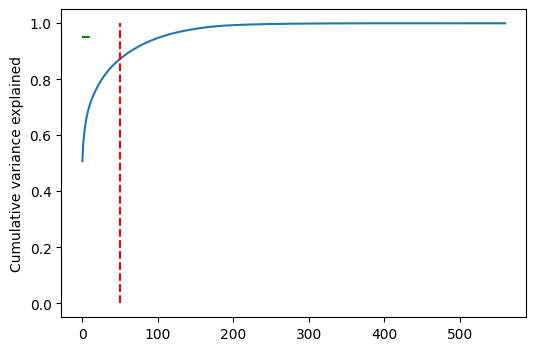

In [9]:
fig = plt.figure(figsize=[6,4],dpi=100)
plt.plot(var_cumu)
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=10, xmin=0, colors="g", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.show()

6. Perform k-means clustering and plot SSE to find out the optimal number of clusters

In [10]:

pca_final = PCA(n_components=50)
X_pca_final = pca_final.fit_transform(X_scaled)

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=123)
kmeans.fit(X_pca_final)
kmeans.labels_



array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

Remember that each label in y represents
* 1 - WALKING
* 2 - WALKING_UPSTAIRS
* 3 - WALKING_DOWNSTAIRS
* 4 - SITTING
* 5 - STANDING
* 6 - LAYING

7. Calculate the SSE for 6 clusters using k-means

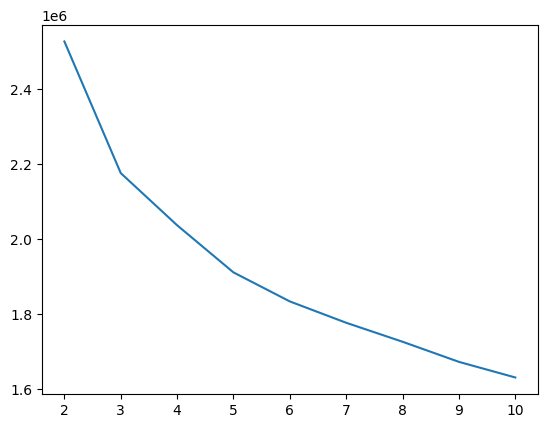

In [12]:
sse = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=123)
    kmeans.fit(X_pca_final)

    sse.append(kmeans.inertia_)

# plot the SSEs for each n_clusters
# sse
plt.plot(range_n_clusters, sse)

8. Compare the Silhouette score of k-means and Agglomerative clustering

For n_clusters=2, the silhouette score is 0.4502370839433418
For n_clusters=3, the silhouette score is 0.36712992411320244
For n_clusters=4, the silhouette score is 0.19053931404391028
For n_clusters=5, the silhouette score is 0.16636256950236347
For n_clusters=6, the silhouette score is 0.1540015803955481
For n_clusters=7, the silhouette score is 0.11976060704954158
For n_clusters=8, the silhouette score is 0.11624902280377288
For n_clusters=9, the silhouette score is 0.11605823090308556
For n_clusters=10, the silhouette score is 0.11876322060433582


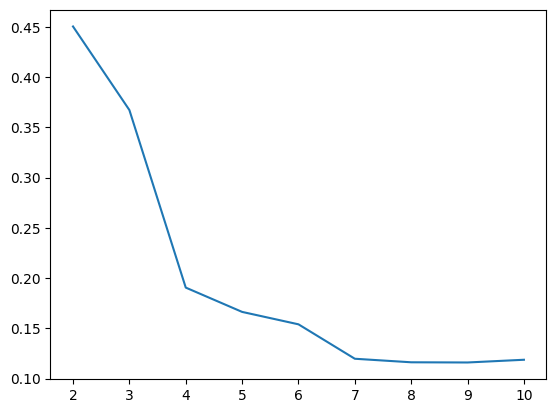

In [13]:
# # silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_avgs = []
for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    silhouette_avgs.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avgs)

9. Perform DBSCAN clustering with <i>epsilon</i>=10 and <i>min_samples</i>=5

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X_pca_final)
dbscan.labels_

array([-1,  0,  0, ..., -1,  2,  2])

10. Compare the silhoutte score of DBSCAN with earlier clustering methods.

In [16]:
silhouette_avg = silhouette_score(X_pca_final, dbscan.labels_)
print(silhouette_avg)

0.13977226656130218
